## 1. Data Cleaning

### Importing Libraries and Loading the Dataset
Before getting started, we import the libraries we will be using for the data analysis:
- `pandas` is used for tabular data.
- `numpy` will be useful later for numerical operations.
- `matplotlib.pyplot` and `seaborn` are often used for visualisations (we'll use them later).


Next, we load the dataset using `pd.read_csv()`. This reads the CSV file into a DataFrame. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Redundant? 

df = pd.read_csv("../data/DASH_A1.csv")
df

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


As you can see from the initial output of the dataset, there are several issues that need to be addressed before performing analysis:
- Missing values
- Unsorted dates
- Duplicate rows

We will get to all of these issues below. 

### Data Overview
Before we begin cleaning, it is important to understand what the dataset looks like. We use `df.info()` to inspect the data types, number of values per column, and overall shape of the dataset.

In [3]:
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1184 non-null   object 
 1   Close   1159 non-null   float64
 2   High    1160 non-null   float64
 3   Low     1168 non-null   float64
 4   Open    1167 non-null   float64
 5   Volume  1158 non-null   float64
dtypes: float64(5), object(1)
memory usage: 55.6+ KB


We also check for missing values in each column to identify where cleaning is needed. We will address this issue further down.

In [4]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Date       0
Close     25
High      24
Low       16
Open      17
Volume    26
dtype: int64


### Sorting Data and Checking for Duplicates
Since this dataset represents time series data, where each row corresponds to a trading day for DoorDash (DASH), it is helpful to set the `Date` column as the index. This will make it easier to work with the data rather than keeping the unique index value. 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

Now that we have set the date as the index, we can sort the data in chronological order. 

In [6]:
df.sort_index(inplace=True)
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


Now, let's focus on duplicates. We check for two types:
- **Duplicate rows**: these are rows where all values (across every column) are identical.
- **Duplicate dates**: since this is time series data, each date should only appear once. 

In [7]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

duplicate_dates = df[df.index.duplicated()]
print(f"Number of duplicate dates: {duplicate_dates.shape[0]}")
duplicate_dates = df[df.duplicated(keep=False)]
print(duplicate_dates)

Number of duplicate rows: 50
                 Close        High         Low        Open     Volume
Date                                                                 
2020-12-15  158.889999  161.419998  153.759995  157.100006  5017000.0
2020-12-15  158.889999  161.419998  153.759995  157.100006  5017000.0
2021-01-25  191.809998  215.389999  191.309998  194.330002  3430400.0
2021-01-25  191.809998  215.389999  191.309998  194.330002  3430400.0
2021-05-10  120.449997  125.089996  118.559998  124.900002  2277500.0
...                ...         ...         ...         ...        ...
2025-03-20  192.929993  195.210007  187.865005  188.070007  5600800.0
2025-04-17  181.240005  182.889999  177.979996  181.250000  2496100.0
2025-04-17  181.240005  182.889999  177.979996  181.250000  2496100.0
2025-04-28  187.880005  190.690002  186.550003  188.809998  3083600.0
2025-04-28  187.880005  190.690002  186.550003  188.809998  3083600.0

[100 rows x 5 columns]
Number of duplicate dates: 50
       

From our check, it appears that the duplicate dates aligns with the duplicated rows, suggesting there are 50 rows that are exact copies of others. Since the dataset is time series, this is problematic — each date should represent a single trading day. Let's go ahead and delete all the duplicate rows.

In [8]:
df.drop_duplicates(inplace=True)
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


### Missing Data
After sorting and removing duplicates, the next step is to handle any missing values in the dataset. From our earlier check, we found that there are several missing entries per column. We follow the firm's official cleaning rules to handle missing data, one column at a time. 

Let's start with filling the missing values in the `Close` column first. They are forward-filled to avoid look-ahead bias.

In [9]:
df['Close'] = df['Close'].ffill()
print(f"Remaining missing values in 'Close': {df['Close'].isnull().sum()}")

Remaining missing values in 'Close': 0


Now let's move on to the `Open` column, which should be filled using the previous day's `Close` price.

In [10]:
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
print(f"Remaining missing values in 'Open': {df['Open'].isnull().sum()}")



Remaining missing values in 'Open': 0


Next up is the the `High` and `Low` columns, which should be filled using the average value of that column for the month in which the missing entry appears.

In [11]:
df['Month'] = pd.to_datetime(df.index).to_period('M')
monthly_high_mean = df.groupby('Month')['High'].transform('mean')
df['High'] = df['High'].fillna(monthly_high_mean)
monthly_low_mean = df.groupby('Month')['Low'].transform('mean')
df['Low'] = df['Low'].fillna(monthly_low_mean)
df.drop('Month', axis=1, inplace=True)

print(f"Remaining missing values in 'High': {df['High'].isnull().sum()}")
print(f"Remaining missing values in 'Low' : {df['Low'].isnull().sum()}")

Remaining missing values in 'High': 0
Remaining missing values in 'Low' : 0


Lastly, let's move on to the `Volume` column, where missing values should be filled with 0 if the `Open` and `Close` prices are equal on a day, indicating no trading activity. Otherwise, missing values should be filled with the median trading volume across the dataset.

In [12]:
missing_volume = df['Volume'].isna()

zero_vol_mask = missing_volume & (df['Close'] == df['Open'])
df.loc[zero_vol_mask, 'Volume'] = 0

non_zero_vol_mask = missing_volume & (df['Close'] != df['Open'])
volume_median = df['Volume'].median()
df.loc[non_zero_vol_mask, 'Volume'] = volume_median

print(f"Remaining missing values in 'Volume': {df['Volume'].isnull().sum()}")

Remaining missing values in 'Volume': 0


Now that we have addressed each column, let's carry out a final check for any remaining missing values:

In [13]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

At this stage, we have successfully cleaned the dataset following the firm's official guidelines. We will save the cleaned dataset to a new CSV file for reuse.

In [14]:
df.to_csv('cleaned_data.csv')

## 2. Feature Engineering
With the dataset now cleaned, we move on to feature engineering, which is the process of creating new variables from existing data to carry out our analysis. We start with creating a new column for **simple daily returns**, which represents the percentage change in the stock’s closing price from one trading day to the next:

In [15]:
df['Daily_Return'] = df['Close'].pct_change()

Now let's calculate **logarithmic returns** (or log returns), which are calculated using the natural logarithm of the ratio between today’s and yesterday’s `Close` prices:

In [16]:
df["PrevClose"] = df["Close"].shift(1)
df['LogReturn'] = np.log(df['Close'] / df["PrevClose"])

Momentum captures the rate of price change over a period. Here, we compute a **20-day momentum**, which measures how much the stock price has moved over the past 20 trading days. This tells us how strong the recent upward or downward movement has been:

In [17]:
df['20D_Momentum'] = df['Close'] - df['Close'].shift(20)

Now we move on to calculate the **20-day Simple Moving Average (SMA)**. This smooths out short-term fluctuations by taking the average of the last 20 days of closing prices:


In [18]:
df['20D_SMA'] = df['Close'].rolling(window=20).mean()

To assess short-term risk, we calculate the **20-day rolling volatility**, which is the standard deviation of daily returns over a 20-day window:

In [19]:
df['20D_Volatility'] = df['Daily_Return'].rolling(window=20).std()

Next, let's extract the **day of the week** from the date index:

In [20]:
df['Day_of_the_week'] = df.index.strftime('%a')


To detect unusual spikes in stock performance, we identify **price surge days**, which is when the daily return is more than 4 standard deviations above the mean of all daily returns.

In [21]:
mean_return = df["Daily_Return"].mean()
std_return = df["Daily_Return"].std()
return_threshold = mean_return + (4 * std_return)

condition = df["Daily_Return"] > return_threshold

df["Price_Surge"] = condition

surge_days = df[df["Price_Surge"]]
print(f"Number of price surge days: {df['Price_Surge'].sum()}")
surge_days[["Close", "Daily_Return", "Price_Surge"]].head()

Number of price surge days: 3


,Close,Daily_Return,Price_Surge
Date,,,
2021-01-12,191.990005,0.149641,True
2021-05-14,141.070007,0.221491,True
2023-11-02,87.790001,0.156653,True


To highlight days of unusually high trading activity, we identify **volume spike days** which is when the trading volume is more than 6 standard deviations above the mean volume.

In [22]:
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
volume_threshold = mean_volume + (6 * std_volume)

condition = df["Volume"] > volume_threshold

df["Volume_Spike"] = condition

spike_days = df[df['Volume_Spike']]
print(f"Number of volume spike days: {df['Volume_Spike'].sum()}")
spike_days[['Volume', 'Volume_Spike']].head()

Number of volume spike days: 3


,Volume,Volume_Spike
Date,,
2022-02-17,47405700.0,True
2023-12-15,30556000.0,True
2025-03-21,73637400.0,True


Let's move on to **Bollinger Bands**, which are indicators used to detect potential overbought or oversold conditions in a stock.

They consist of three components:
- A 20-day Simple Moving Average (SMA)
- An upper band 
- A lower band 

When the price moves toward the upper band, it may be considered **overbought**; toward the lower band, **oversold**.

In [23]:
df['Dev'] = df['Close'].rolling(window=20).std()
df['BB_High'] = df['20D_SMA'] + 2 * df['Dev']
df['BB_Low'] = df['20D_SMA'] - 2 * df['Dev']

With all engineered features now added to the dataset, we are ready to proceed to the next stage of analysis.

The table below shows the new data frame, which now includes momentum, volatility, return metrics, and trading signals (e.g., surge/spike flags and Bollinger Bands).

In [24]:
pd.set_option('display.max_rows', None)
df

,Close,High,Low,Open,Volume,Daily_Return,PrevClose,LogReturn,20D_Momentum,20D_SMA,20D_Volatility,Day_of_the_week,Price_Surge,Volume_Spike,Dev,BB_High,BB_Low
Date,,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wed,False,False,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thu,False,False,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Fri,False,False,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Mon,False,False,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tue,False,False,NaN,NaN,NaN
2020-12-16,158.050003,167.470001,157.199997,161.179993,3061300.0,-0.005287,158.889999,-0.005301,NaN,NaN,NaN,Wed,False,False,NaN,NaN,NaN
2020-12-17,154.210007,161.660004,152.148868,159.100006,6369800.0,-0.024296,158.050003,-0.024596,NaN,NaN,NaN,Thu,False,False,NaN,NaN,NaN
2020-12-18,166.350006,169.949997,147.320007,154.210007,8157800.0,0.078724,154.210007,0.075779,NaN,NaN,NaN,Fri,False,False,NaN,NaN,NaN
2020-12-21,160.229996,173.460007,155.000000,169.070007,3884200.0,-0.036790,166.350006,-0.037484,NaN,NaN,NaN,Mon,False,False,NaN,NaN,NaN


## 3. Key Dates

Adds a Year column for grouping.

Computes 20-day rolling standard deviation of daily returns to estimate volatility.

In [25]:
df['Year'] = df.index.year

df['Rolling Volatility'] = df['Daily_Return'].rolling(window=20).std()

Groups data by year and calculates:

1. Dates and values of maximum/minimum volatility and daily returns.

2. Dates and values of highest trading volume, high prices, and low prices.

3. First and last price of each year (Open and Close).

In [32]:
df.groupby('Year').agg(
    HighestVolatilityDate=('Rolling Volatility', 'idxmax'),
    HighestVolatility=('Rolling Volatility', 'max'),
    LargestPriceSurgeDate=('Daily_Return', 'idxmax'),
    LargestPriceSurge=('Daily_Return', 'max'),
    LargestPriceDropDate=('Daily_Return', 'idxmin'),
    LargestPriceDrop=('Daily_Return', 'min'),
    HighestVolumeDate=('Volume', 'idxmax'),
    HighestVolume=('Volume', 'max'),
    HighestHighDate=('High', 'idxmax'),
    HighestHigh=('High', 'max'),
    LowestLowDate=('Low', 'idxmin'),
    LowestLow=('Low', 'min'),
    AnnualOpen=('Open', 'first'),
    AnnualClose=('Close', 'last')
)

,HighestVolatilityDate,HighestVolatility,LargestPriceSurgeDate,LargestPriceSurge,LargestPriceDropDate,LargestPriceDrop,HighestVolumeDate,HighestVolume,HighestHighDate,HighestHigh,LowestLowDate,LowestLow,AnnualOpen,AnnualClose
Year,,,,,,,,,,,,,,
2020,NaT,NaN,2020-12-18,0.078724,2020-12-14,-0.085714,2020-12-09,25373700.0,2020-12-09,195.500000,2020-12-31,135.380005,182.000000,142.750000
2021,2021-05-20,0.067393,2021-05-14,0.221491,2021-02-22,-0.135457,2021-03-09,20400000.0,2021-11-15,257.250000,2021-05-13,110.129997,142.500000,148.899994
2022,2022-06-01,0.080994,2022-03-16,0.134512,2022-05-11,-0.131621,2022-02-17,47405700.0,2022-01-12,152.494995,2022-10-24,41.365002,149.610001,48.820000
2023,2023-11-06,0.047470,2023-11-02,0.156653,2023-02-17,-0.075946,2023-12-15,30556000.0,2023-12-11,103.980003,2023-01-06,45.931999,49.980000,98.889999
2024,2024-02-27,0.033547,2024-08-02,0.083457,2024-05-02,-0.103170,2024-05-02,22134800.0,2024-12-17,181.779999,2024-01-04,93.330002,97.800003,167.750000
2025,2025-04-10,0.048324,2025-04-09,0.137738,2025-04-03,-0.080634,2025-03-21,73637400.0,2025-06-06,220.880005,2025-04-07,155.399994,168.789993,218.119995


# 4. Data Visualisation

## a. Bollinger Bands and Subplots

### Price, Volume, and Volatility Overview

This section visualises key market dynamics of DoorDash’s stock over time.
We include technical indicators such as the Simple Moving Average (SMA) and Bollinger Bands, trading Volume, and Rolling Volatility to gain insights into price movement and risk.

- `fig, (ax1, ax2, ax3) = plt.subplots(...)`: This creates three vertically stacked plots.
- `height_ratios` of 4:1:1 : Price chart occupies 4x more space than volume and volatility. This is deliberate, as price action is the most analyzed component.
- `hspace`=0.1: Minimizes the space between charts to make the figure compact and cohesive, while still readable.

### 1. Close Price with SMA and Bollinger Bands

The first subplot visualises:  
- The daily closing price of DASH stock.  
- The 20-day SMA, which smooths price trends.  
- The Bollinger Bands (grey dashed lines), which represent ±2 standard deviations from the SMA, often used to identify overbought or oversold conditions.
- `fill_between(...)` shades the area between the upper and lower Bollinger Bands in light grey, helping highlight periods of increased price volatility without overwhelming the visual.
- A transparency level of `alpha=0.2` is chosen to make the shaded band slightly more prominent while still allowing other lines (like the Close price) to be seen clearly above it. This enhances visual contrast in volatile ranges.


### 2. Trading Volume

The second subplot presents the daily trading volume in millions.
Volume trends may signal investor sentiment or major news catalysts.

- Why not using `bar()` but `plot()`?
Using bars would result in extremely tall vertical spikes for days with unusually high volume (e.g., 70M+), which can distort the subplot layout or force the figure size to expand. A continuous line with consistent height avoids this issue while maintaining trend visibility.
- Scaling:
Volume is scaled down by 1e6 (dividing by 1 million) so that the y-axis reads in millions (M)
- e.g., 70M instead of 70,000,000 keeping labels clean and aligned with industry visual standards like Yahoo Finance.

### 3. Rolling Volatility (20-Day) and Finalise

The third subplot shows 20-day rolling volatility, which reflects the variability of returns.
Higher volatility suggests higher uncertainty and risk.

- `axhline(...)` adds a dashed grey line representing the mean volatility, helping viewers identify whether current volatility is above or below average — useful for assessing market conditions.
- `fill_between(...)` adds a subtle shaded region `(alpha=0.1)` under the volatility curve to visually emphasize spikes, while still preserving the clean minimalist layout.

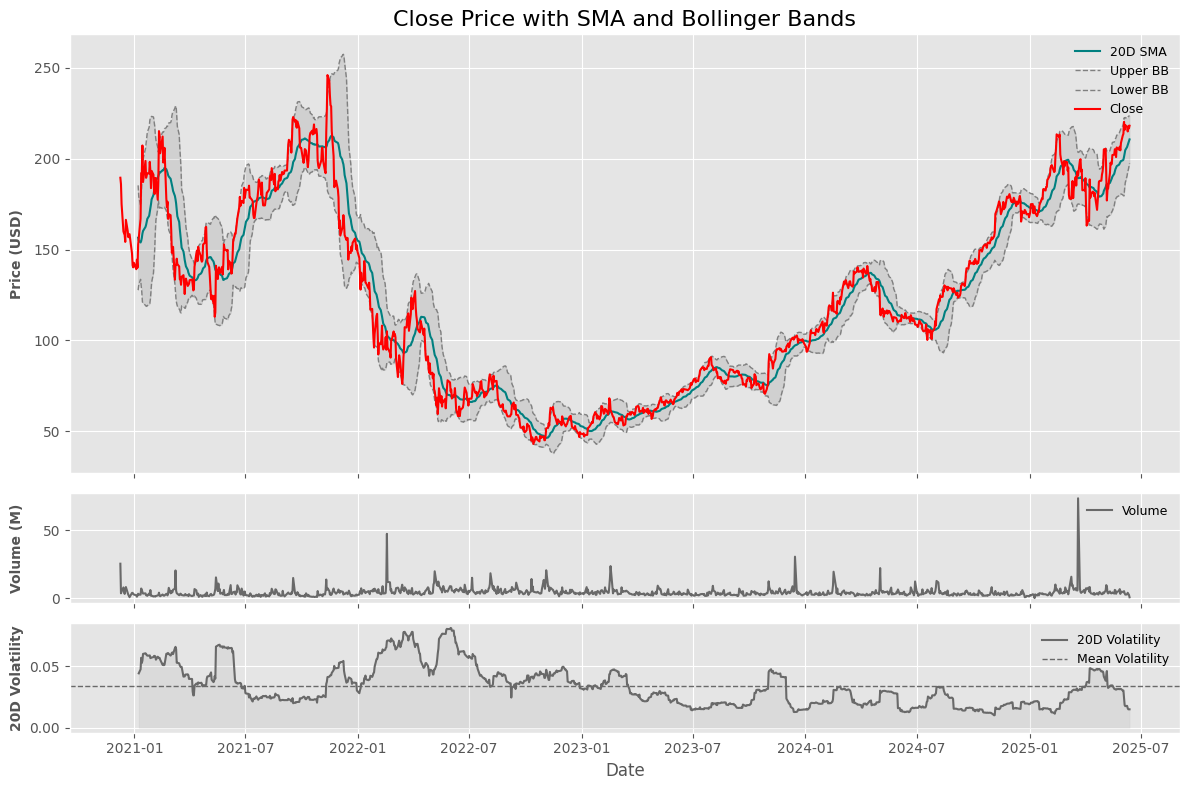

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={"height_ratios": [4, 1, 1]})
fig.subplots_adjust(hspace=0.1)

# 1. Close with SMA and Bollinger Bands
ax1.plot(df.index, df['20D_SMA'], label='20D SMA', color="teal")
ax1.plot(df.index, df['BB_High'], linestyle='--', color='grey', label='Upper BB', linewidth=1)
ax1.plot(df.index, df['BB_Low'], linestyle='--', color='grey', label='Lower BB', linewidth=1)
ax1.fill_between(df.index, df['BB_High'], df['BB_Low'], color='grey', alpha=0.2)
ax1.plot(df.index, df['Close'], label='Close', color="red", linewidth=1.5)
ax1.set_title('Close Price with SMA and Bollinger Bands', fontsize=16)
ax1.set_ylabel('Price (USD)', fontsize=10, fontweight='bold')
ax1.legend(loc='upper right', frameon=False, fontsize=9)



# 2. Volume
ax2.plot(df.index, df['Volume'] / 1e6, label='Volume' , color='dimgrey')
ax2.set_ylabel('Volume (M)', fontsize=10, fontweight='bold')
ax2.legend(loc='upper right', frameon=False, fontsize=9)



# 3. Rolling Volatility
ax3.plot(df.index, df['20D_Volatility'], label='20D Volatility', color='dimgrey')
ax3.set_ylabel('20D Volatility', fontsize=10, fontweight='bold')
ax3.axhline(df["20D_Volatility"].mean(), color='dimgrey', linestyle='--', linewidth=1, label="Mean Volatility")
ax3.fill_between(df.index, df["20D_Volatility"], color='grey', alpha=0.1)
ax3.legend(loc='upper right', frameon=False, fontsize=9)



plt.xlabel('Date')
fig.align_ylabels([ax1, ax2, ax3])
plt.tight_layout()
plt.show()



## b. Histogram of Logarithmic Returns
This plot visualises the distribution of daily **logarithmic returns** for DoorDash stock.

* Log returns are often preferred in financial analysis due to their time-additive property and symmetry in treating positive and negative changes.
* The histogram uses **30 bins** balances granularity and clarity.
* A `ggplot` style is applied for consistent visual aesthetics, with black edges added to each bar for better contrast.

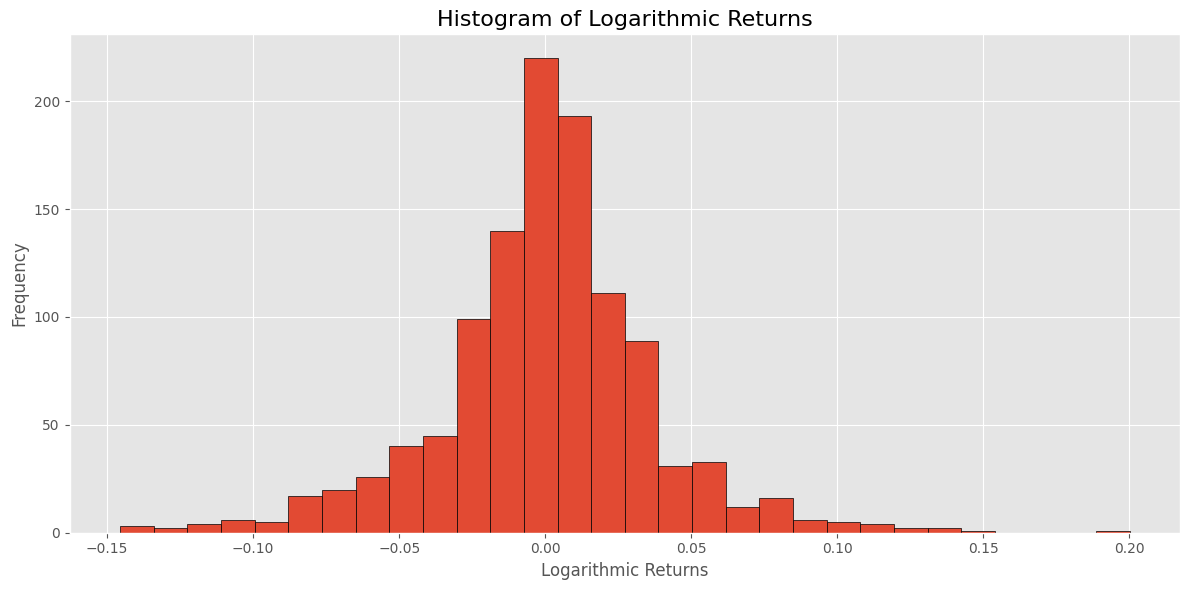

In [28]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.figure(figsize=(12, 6))
plt.hist(df.LogReturn, bins=30, edgecolor="black")
plt.title("Histogram of Logarithmic Returns", fontsize=16)

plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Logarithmic Returns", fontsize=12)
plt.tight_layout()
plt.show()

## Scatter Plot: Volume vs. Daily Return

This scatter plot explores the relationship between **daily returns** and **trading volume** for DoorDash stock.

* Each point represents a single trading day, plotting the daily return on the x-axis and the corresponding trading volume on the y-axis.
* The use of `alpha=0.5` (transparency) allows overlapping points to remain visible, which is useful in dense regions.
* The plot applies a `ggplot` style for clarity and consistency with other visualisations.

This chart helps assess whether higher returns are associated with higher trading activity, although in this case, no strong linear relationship is immediately evident.

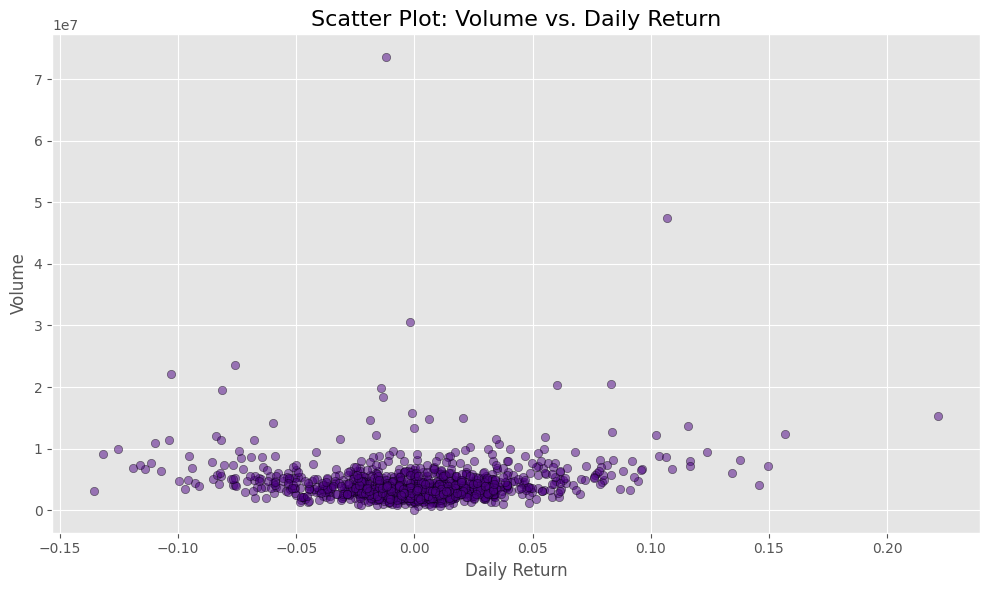

In [29]:
plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
plt.scatter(df.Daily_Return, df.Volume, alpha=0.5, color="indigo", edgecolor="black")

plt.title("Scatter Plot: Volume vs. Daily Return", fontsize=16)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Volume", fontsize=12)

plt.tight_layout()
plt.show()

### c. Scatterplot (with colour scale)

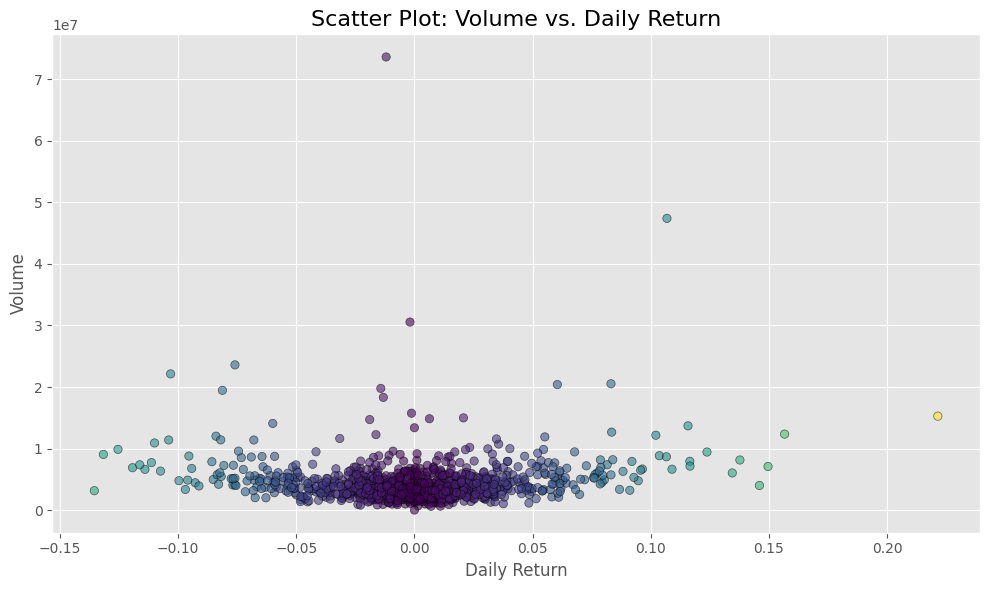

In [30]:
#with colour scale 

plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
plt.scatter(df.Daily_Return, df.Volume, c=np.abs(df.Daily_Return), cmap="viridis", alpha=0.6, edgecolor="black")

plt.title("Scatter Plot: Volume vs. Daily Return", fontsize=16)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Volume", fontsize=12)

plt.tight_layout()
plt.show()

### c. Scatterplot (log volume, colour scale, and colour bar)

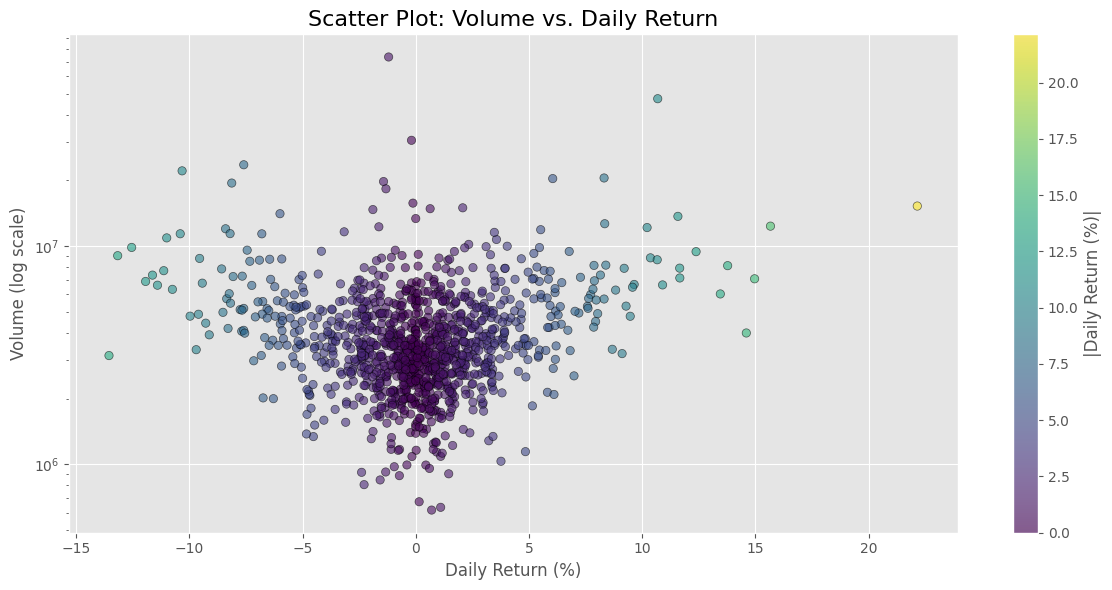

In [31]:
# colorscale & log volume  

plt.style.use("ggplot")

plt.figure(figsize=(12, 6))
plt.scatter(df.Daily_Return*100, df.Volume, c=np.abs(df.Daily_Return)*100, cmap="viridis", alpha=0.6, edgecolor="black")

plt.yscale("log")

plt.title("Scatter Plot: Volume vs. Daily Return", fontsize=16)
plt.xlabel("Daily Return (%)", fontsize=12)
plt.ylabel("Volume (log scale)", fontsize=12)
plt.colorbar(label="|Daily Return (%)|")

plt.tight_layout()
plt.show()